In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning
from sklearn.model_selection import train_test_split,TimeSeriesSplit,KFold
from statsmodels.regression.linear_model import yule_walker
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import statsmodels.api as sm
import plotly.express as px
import pandas as pd
import numpy as np
import warnings
import random
import math


warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', ValueWarning)
warnings.simplefilter('ignore', UserWarning)

In [19]:
df = pd.read_csv("walmart_sales.csv")

In [20]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [21]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [22]:
data = df.groupby(["Date"])["Weekly_Sales","IsHoliday"].sum()

In [23]:
data["IsHoliday"] = np.where(data["IsHoliday"] > 0, 1.0, 0.0)

In [24]:
data.head()

,Weekly_Sales,IsHoliday
Date,,
2010-02-05,49750740.50,0.0
2010-02-12,48336677.63,1.0
2010-02-19,48276993.78,0.0
2010-02-26,43968571.13,0.0
2010-03-05,46871470.30,0.0


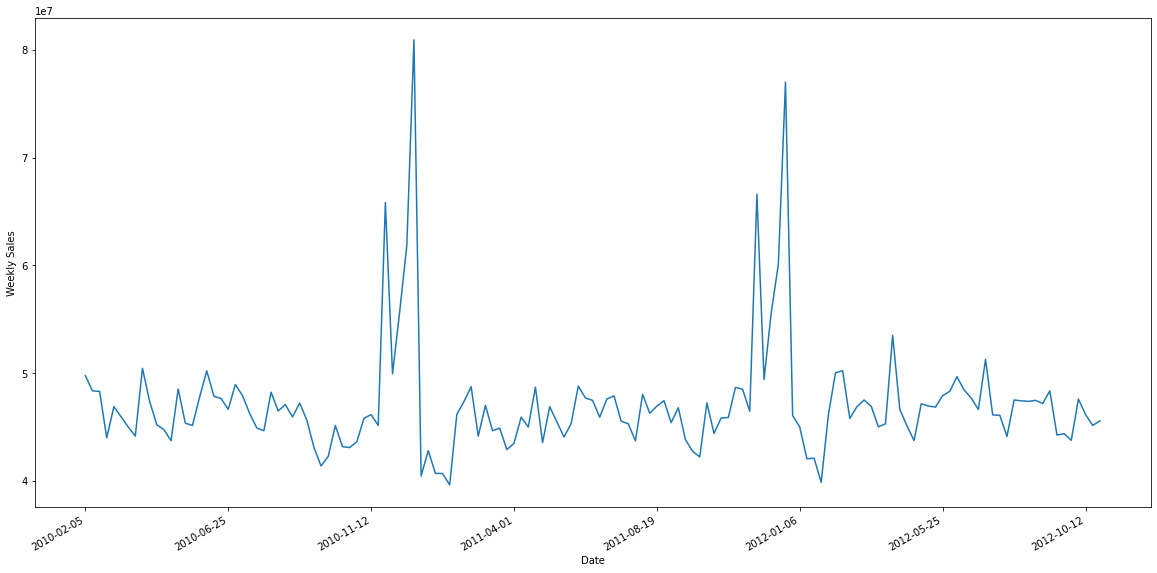

In [25]:
ax1 = data.Weekly_Sales.plot(figsize = (20,10))
ax1.set_ylabel("Weekly Sales")
plt.gcf().autofmt_xdate()
plt.show()

In [26]:
data.corr()

,Weekly_Sales,IsHoliday
Weekly_Sales,1.000000,0.172683
IsHoliday,0.172683,1.000000


# ARIMA

In [29]:
train,test = train_test_split(data[["Weekly_Sales"]], test_size = 0.1, shuffle = False)
arima = ARIMA(train, order=(0,1,0))
arima_res = arima.fit()
fcst = arima_res.forecast(steps = test.shape[0])
print(f"r2 score: {r2_score(test.Weekly_Sales,fcst)}")

r2 score: -0.000549064909585173


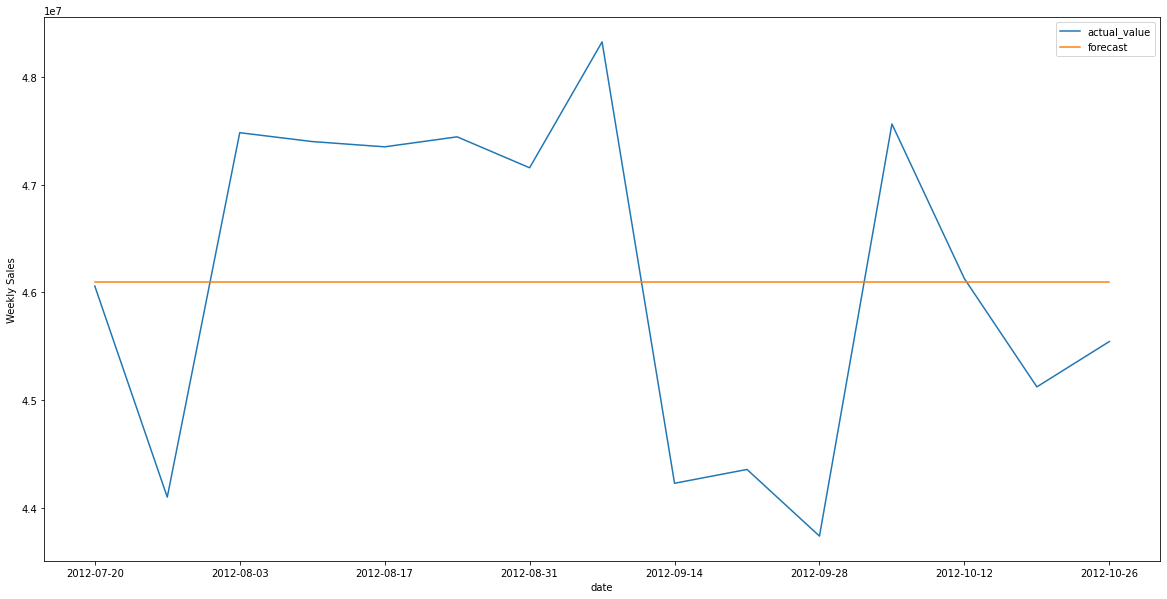

In [30]:
arima_df = pd.DataFrame(
    {
        "date" : test.index,
        "actual_value" : test.Weekly_Sales.values,
        "forecast" : fcst
    }
)
arima_df.set_index(["date"], inplace =  True)
ax_arima = arima_df.plot(figsize = (20,10))
ax_arima.set_ylabel("Weekly Sales")
plt.show()

# SARIMA

In [31]:
train,test = train_test_split(data[["Weekly_Sales"]], test_size = 0.1, shuffle = False)
sarimax = sm.tsa.statespace.SARIMAX(train, order=(0,1,0), seasonal_order=(1,0,0,52))
sarimax_res = sarimax.fit(disp = False)
fcst = sarimax_res.forecast(steps = test.shape[0])
print(f"r2 score: {r2_score(test.Weekly_Sales,fcst)}")

r2 score: 0.7557643718863831


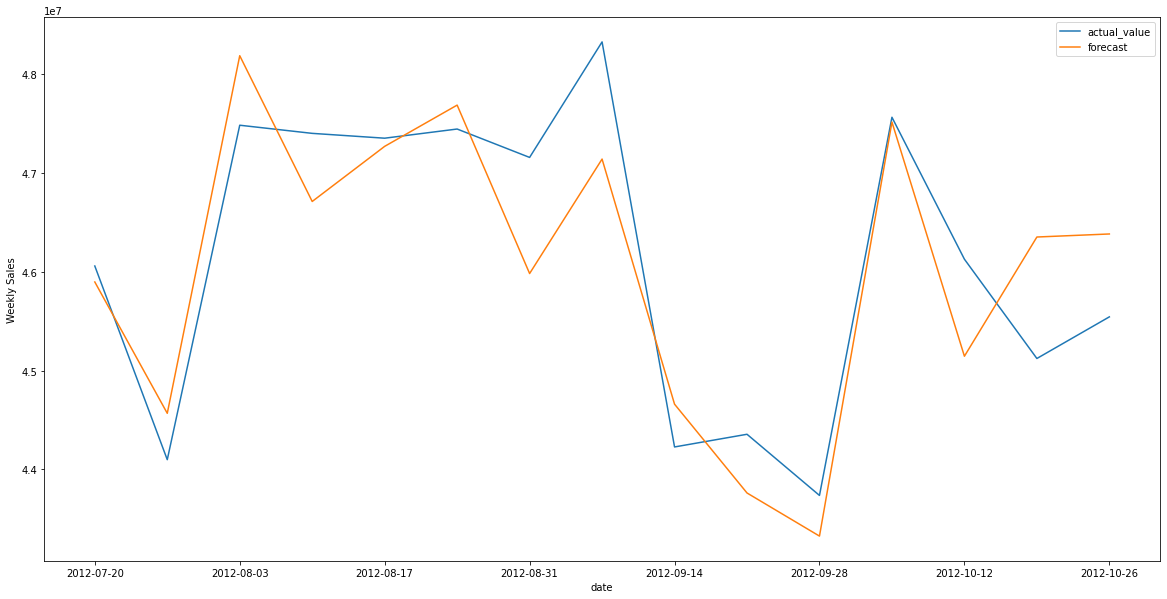

In [32]:
sarima_df = pd.DataFrame(
    {
        "date" : test.index,
        "actual_value" : test.Weekly_Sales.values,
        "forecast" : fcst
    }
)
sarima_df.set_index(["date"], inplace =  True)
ax_sarima = sarima_df.plot(figsize = (20,10))
ax_sarima.set_ylabel("Weekly Sales")
plt.show()

# SARIMAX

In [33]:
train,test = train_test_split(data, test_size = 0.1, shuffle = False)
sarimax = sm.tsa.statespace.SARIMAX(endog = train.Weekly_Sales, exog= train.IsHoliday, order=(0,1,0), seasonal_order=(1,0,0,52))
sarimax_res = sarimax.fit(disp = False)
fcst = sarimax_res.forecast(steps = test.shape[0], exog = test.IsHoliday)
print(f"r2 score: {r2_score(test.Weekly_Sales,fcst)}")

r2 score: 0.7612263728617208


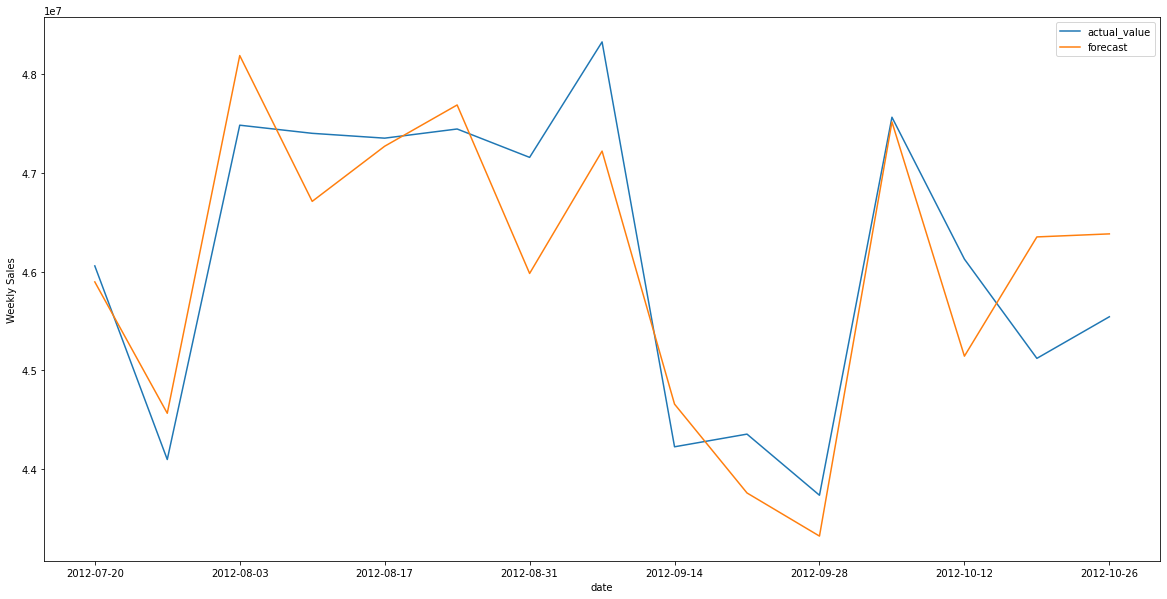

In [34]:
sarimax_df = pd.DataFrame(
    {
        "date" : test.index,
        "actual_value" : test.Weekly_Sales.values,
        "forecast" : fcst
    }
)
sarimax_df.set_index(["date"], inplace =  True)
ax_sarimax = sarimax_df.plot(figsize = (20,10))
ax_sarimax.set_ylabel("Weekly Sales")
plt.show()

In [ ]:
# Author: amyrmahdy
# Date: 26 Jan 2023